In [4]:
#Import dependencies
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [5]:
# Study data files
mouse_metadata_path = "C:/Users/Aline/anaconda3/CSV Files/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/Aline/anaconda3/CSV Files/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_dataset = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"])

# Display the data table for preview
mouse_study_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mouse_study_dataset["Mouse ID"].nunique()

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.  
duplicate_df = mouse_study_dataset[mouse_study_dataset.duplicated(["Mouse ID","Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_dataset = mouse_study_dataset[mouse_study_dataset["Mouse ID"]!="g989"]
mouse_study_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_study_dataset["Mouse ID"].nunique()

248

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_df = mouse_study_dataset.groupby("Drug Regimen")
tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_stdev = regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_study_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean, 
    "Median Tumor Volume": tumor_median, 
    "Tumor Volume Variance": tumor_var, 
    "Tumor Volume Std. Dev.": tumor_stdev,
    "Tumor Volume Std. Err": tumor_SEM,
})

summary_study_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
mouse_study_dataset.groupby("Drug Regimen").agg(aggregations)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

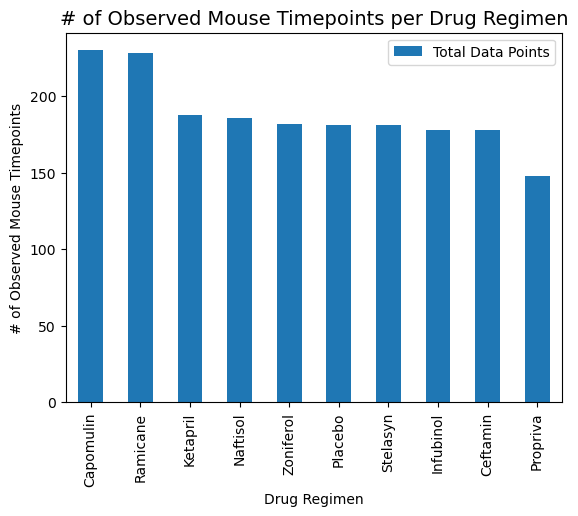

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_dps = mouse_study_dataset["Drug Regimen"].value_counts()
total_dps_df = pd.DataFrame(total_dps)
total_dps_df.columns = ["Total Data Points"]
total_dps_plot = total_dps_df.sort_values("Total Data Points", ascending = False).plot(kind="bar")
total_dps_plot.set_xlabel("Drug Regimen")
total_dps_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.title("# of Observed Mouse Timepoints per Drug Regimen", fontsize = 14)
plt.show()

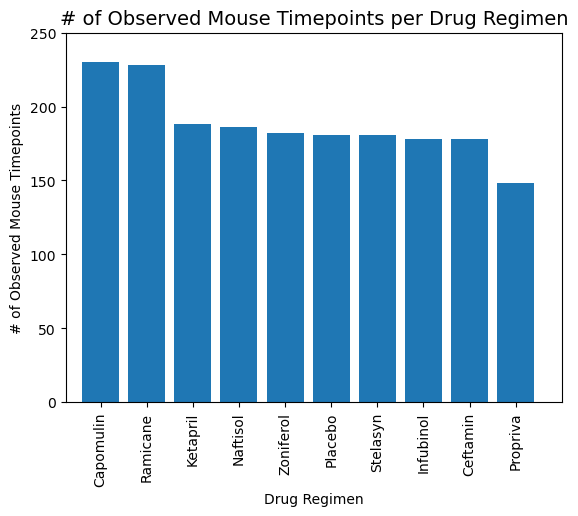

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(total_dps_df))
tick_locations = [value for value in x_axis]
total_dps_df = total_dps_df.sort_values("Total Data Points", ascending = False)
for color in mcolors.TABLEAU_COLORS:
    plt.bar(x_axis, total_dps_df["Total Data Points"], color='tab:blue', alpha = 0.75, align="center")
plt.xticks(tick_locations, total_dps_df.index, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 250)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("# of Observed Mouse Timepoints per Drug Regimen", fontsize = 14)
plt.show()

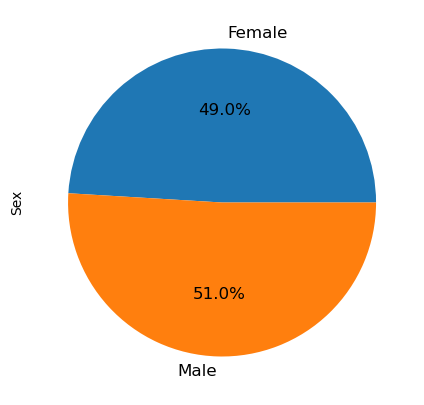

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_study_dataset_gender = mouse_study_dataset.groupby("Sex")
gender_count = mouse_study_dataset_gender["Sex"].count()
gender_plot = gender_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=12, figsize=(5, 5))

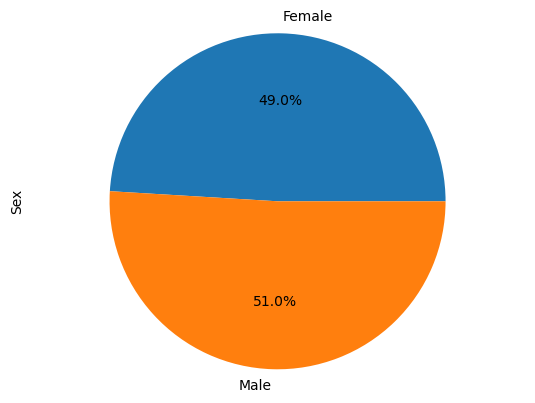

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [gender_count["Female"],gender_count["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_dataset.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, mouse_study_dataset, on = ["Mouse ID", "Timepoint"])
tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])

tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]

# Calculate the IQR and quantitatively determine if there are any potential outliers. (Class Day 3, Activity 2, Ref)
outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Th

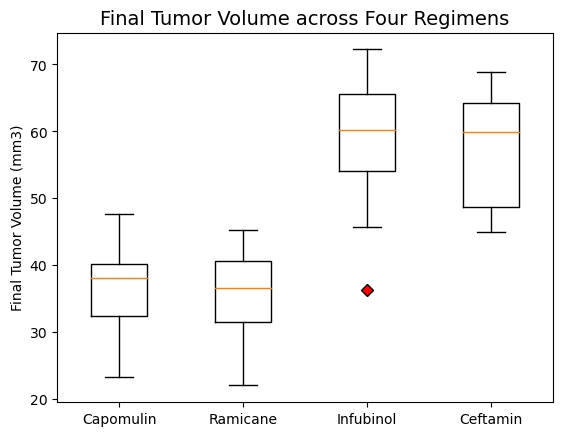

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_diamond = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops = red_diamond)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(treatments)
plt.show()

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Search for mice treated with Capomulin
tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [26]:
# Choose mouse ID b742 for comparison
b742 = mouse_study_dataset.loc[mouse_study_dataset["Mouse ID"]=="b742"]
b742 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0
299,b742,Capomulin,Male,7,21,45,38.939633,0


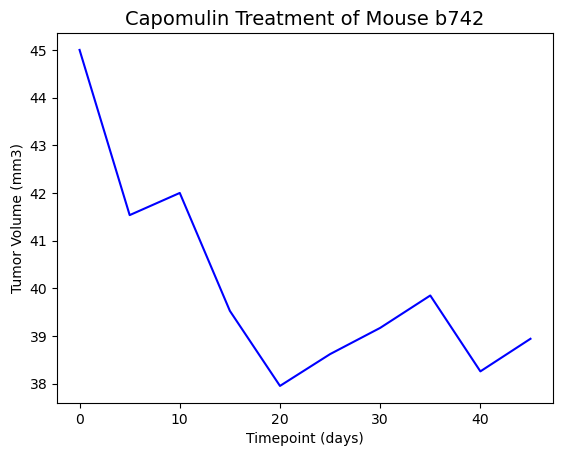

In [30]:
# Make line plot
plt.plot(b742["Timepoint"], b742["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse b742", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

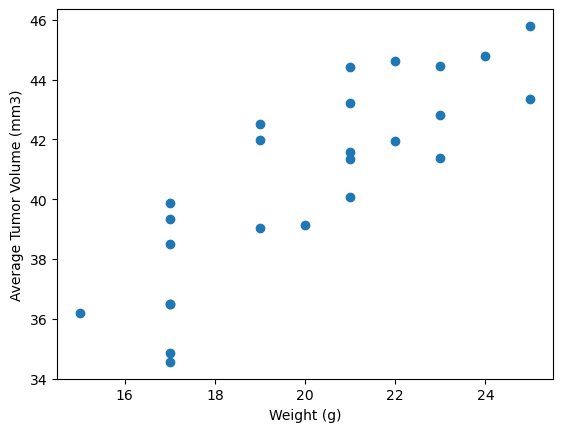

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = mouse_study_dataset.loc[mouse_study_dataset["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84.


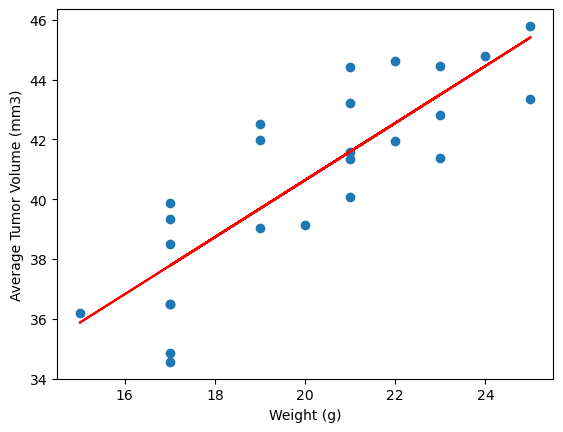

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()